## Overland Flow Scratchwork

First get the necessary libraries

In [13]:
import numpy as np
from matplotlib.pyplot import figure

from landlab.components import OverlandFlow

from landlab.io.esri_ascii import read_esri_ascii
from landlab.grid.mappers import map_max_of_node_links_to_node
from landlab.plot import imshow

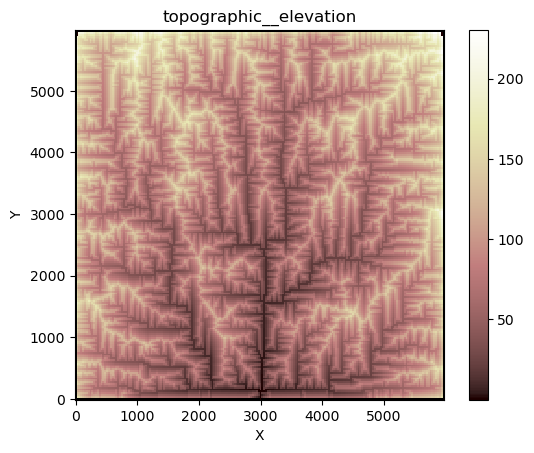

In [19]:
#read in artificially generated raster
grid, z = read_esri_ascii("square-test-basin.asc", name="topographic__elevation")

#close all boundaries
grid.set_closed_boundaries_at_grid_edges(True, True, True, True)

#open the outlet 
#This DEM was generated using Landlab and the outlet node ID was known
my_outlet_node = 100
grid.status_at_node[my_outlet_node] = grid.BC_NODE_IS_FIXED_VALUE

#plot elevation
figure('elevation')
imshow.imshow_grid_at_node(grid, "topographic__elevation")

In [20]:
#add surface water depth (1 m everywhere)
grid.add_ones("surface_water__depth", at = "node", clobber = True)



array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

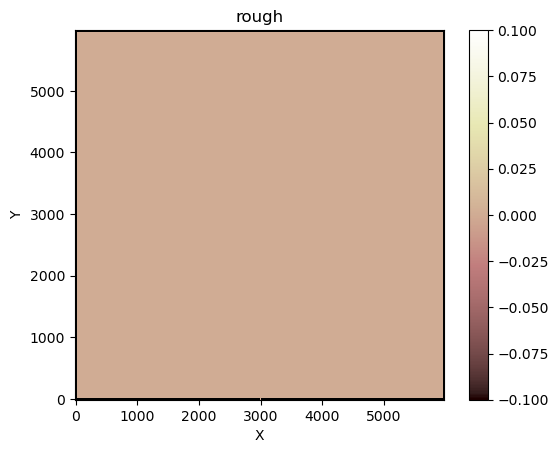

In [21]:
#now add rouughness
grid.add_zeros("rough",  at = "node", clobber=True)

#create some variation
grid.at_node["rough"][6] = 0.02

#plot roughness
figure('mannings_n')
imshow.imshow_grid_at_node(grid, "rough")

In [22]:
#map roughness to link
r = grid.map_mean_of_link_nodes_to_link("rough")

#add to grid
grid.add_field("mannings_n", r, at = "link", clobber=True)

#check that they are there
grid.at_link.keys()


['mannings_n']

In [23]:
grid.at_link.keys()

['mannings_n']

(('surface_water__depth', 'm'),
 ('surface_water__discharge', 'm3/s'),
 ('topographic__elevation', 'm'),
 ('water_surface__gradient', '-'))

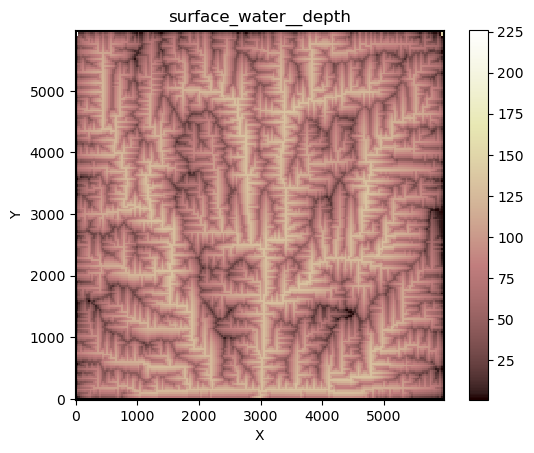

In [26]:


#init overland flow model
of = OverlandFlow(grid, mannings_n = "mannings_n", rainfall_intensity=1, steep_slopes=True)

#run model one step

for i in range(100):
    of.run_one_step()

#plot water depth
figure('water depth')
imshow.imshow_grid_at_node(grid, "surface_water__depth")

grid.at_link.keys()